In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle
import pandas as pd
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

sns.set()

Using TensorFlow backend.
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/matt/anaconda3/envs/ML/lib/p

In [2]:
def reading_in_data(filename):
    
    filename = str(filename)

    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict


In [3]:
input_data_quasar_high = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/quasar_star_preprocessed_data_high")


input_data_quasar_low = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/var_star_preprocessed_data_low")






In [4]:
# input_data_quasar_high = reading_in_data("quasar_star_preprocessed_data_high")

# input_data_quasar_low = reading_in_data("quasar_star_preprocessed_data_low")

In [5]:
print(len(input_data_quasar_high['LABELS']))
print(len(input_data_quasar_low['LABELS']))

4910
4910


In [6]:
input_data_quasar_high.keys()

dict_keys(['IMAGES', 'LABELS', 'NOISE', 'FLUX', 'WAVE', 'REDSHIFT'])

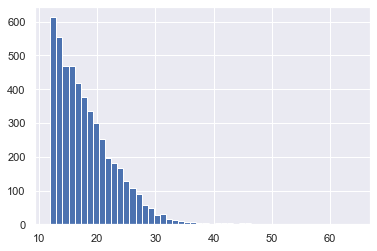

In [7]:
a,b,c = plt.hist(input_data_quasar_high['NOISE'][:10035], bins = 50)

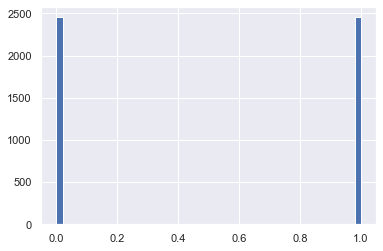

In [8]:
a,b,c = plt.hist(input_data_quasar_high['LABELS'], bins = 50)

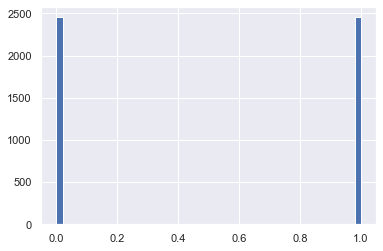

In [9]:
a,b,c = plt.hist(input_data_quasar_low['LABELS'], bins = 50)

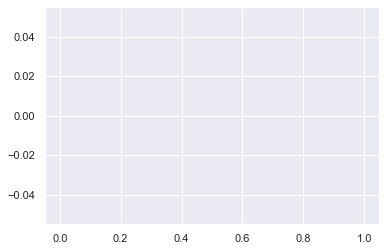

In [10]:
a,b,c = plt.hist(input_data_quasar_low['NOISE'][10035:11806], bins = 50)

In [11]:
# train_images = input_data_quasar_high['IMAGES'][:1000, :, :, :]
# print(np.shape(train_images))
# train_labels = input_data_quasar_high['LABELS'][:1000]
# print(np.shape(train_labels))

# val_images = input_data_quasar_high['IMAGES'][8265:10035, :, :, :]
# print(np.shape(val_images))
# val_labels = input_data_quasar_high['LABELS'][8265:10035]
# print(np.shape(val_labels))

# test_images = input_data_quasar_low['IMAGES'][:15806, :, :, :]
# print(np.shape(test_images))
# test_labels = input_data_quasar_low['LABELS'][:15806]
# print(np.shape(test_labels))

In [12]:
# labels = train_labels

# a,b,c = plt.hist(labels, bins =50)

In [13]:
# train_images = input_data_quasar_high['IMAGES'][:8265, :, :, :]
# print(np.shape(train_images))
# train_labels = input_data_quasar_high['LABELS'][:8265]
# print(np.shape(train_labels))

# val_images = input_data_quasar_high['IMAGES'][8265:10035, :, :, :]
# print(np.shape(val_images))
# val_labels = input_data_quasar_high['LABELS'][8265:10035]
# print(np.shape(val_labels))

# test_images = input_data_quasar_low['IMAGES'][10035:11806, :, :, :]
# print(np.shape(test_images))
# test_labels = input_data_quasar_low['LABELS'][10035:11806]
# print(np.shape(test_labels))

In [14]:
train_images = input_data_quasar_high['IMAGES'][:4174, :, :, :]
print(np.shape(train_images))
train_labels = input_data_quasar_high['LABELS'][:4174]
print(np.shape(train_labels))

val_images = input_data_quasar_high['IMAGES'][4174:4910, :, :, :]
print(np.shape(val_images))
val_labels = input_data_quasar_high['LABELS'][4174:4910]
print(np.shape(val_labels))

test_images = input_data_quasar_low['IMAGES'][4174:4910, :, :, :]
print(np.shape(test_images))
test_labels = input_data_quasar_low['LABELS'][4174:4910]
print(np.shape(test_labels))

(4174, 1, 3681, 1)
(4174,)
(736, 1, 3681, 1)
(736,)
(736, 1, 3681, 1)
(736,)


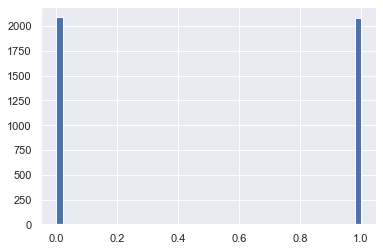

In [15]:
a,b,c = plt.hist(train_labels, bins=50 )

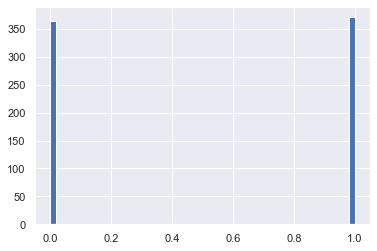

In [16]:
a,b,c = plt.hist(val_labels, bins=50 )

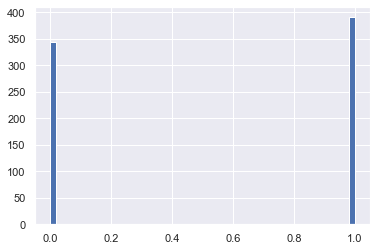

In [17]:
a,b,c = plt.hist(test_labels, bins=50 )

In [18]:
# len(train_labels)
# print(train_labels[8264])

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(12, (1, 12), activation='relu', input_shape=(1, 3681, 1), data_format='channels_last'))
model.add(keras.layers.MaxPooling2D( (1, 4)))

model.add(keras.layers.Conv2D(18, (1, 6), activation='relu', data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1, 4)))

model.add(keras.layers.Conv2D(24, (1, 6), activation='relu', data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1, 4)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))


opt = keras.optimizers.SGD(lr = 5e-3, momentum = 0.25, decay = 1e-5)
model.compile(loss='binary_crossentropy', optimizer = opt  , metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 3670, 12)       156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 917, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 912, 18)        1314      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 228, 18)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 223, 24)        2616      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 55, 24)         0         
_________________________________________________________________
flat

In [20]:
history = model.fit(train_images,
train_labels,
epochs= 80,
batch_size= 32,
validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 4174 samples, validate on 736 samples
Epoch 1/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.6839 - acc: 0.6308 - val_loss: 0.6727 - val_acc: 0.6128
Epoch 2/80
4174/4174 [==============================] - 4s 1ms/step - loss: 0.6483 - acc: 0.6339 - val_loss: 0.6250 - val_acc: 0.6155
Epoch 3/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.5858 - acc: 0.7010 - val_loss: 0.5612 - val_acc: 0.7133
Epoch 4/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.5163 - acc: 0.7544 - val_loss: 0.5016 - val_acc: 0.7391
Epoch 5/80
4174/4174 [==============================] - 6s 1ms/step - loss: 0.4453 - acc: 0.7782 - val_loss: 0.4203 - val_acc: 0.7853
Epoch 6/80
4174/4174 [==============================] - 4s 1ms/step - loss: 0.3592 - acc: 0.8316 - val_loss: 0.3202 - val_acc: 0.8261
Epoch 7/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.2708 - acc: 0.8694 - va

4174/4174 [==============================] - 5s 1ms/step - loss: 0.0418 - acc: 0.9883 - val_loss: 0.0418 - val_acc: 0.9946
Epoch 60/80
4174/4174 [==============================] - 4s 1ms/step - loss: 0.0333 - acc: 0.9892 - val_loss: 0.0390 - val_acc: 0.9946
Epoch 61/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.0312 - acc: 0.9916 - val_loss: 0.0387 - val_acc: 0.9932
Epoch 62/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.0384 - acc: 0.9892 - val_loss: 0.0431 - val_acc: 0.9932
Epoch 63/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.0290 - acc: 0.9916 - val_loss: 0.0509 - val_acc: 0.9891
Epoch 64/80
4174/4174 [==============================] - 5s 1ms/step - loss: 0.0440 - acc: 0.9880 - val_loss: 0.0404 - val_acc: 0.9946
Epoch 65/80
4174/4174 [==============================] - 4s 1ms/step - loss: 0.0442 - acc: 0.9871 - val_loss: 0.0457 - val_acc: 0.9932
Epoch 66/80
4174/4174 [==============================] - 5s 1ms/ste

736/736 [==============================] - 0s 655us/step
Test loss = 0.23591209883275238
Test accuracy = 0.9035326086956522


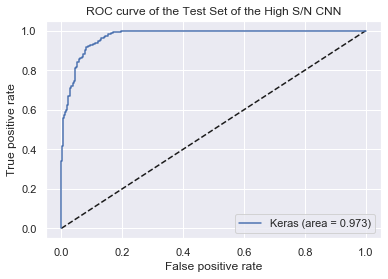

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss = ' +str(test_loss))
print('Test accuracy = ' +str(test_acc))

y_pred_keras = model.predict(test_images).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of the Test Set of the High S/N CNN')
plt.legend(loc='best')
plt.show()

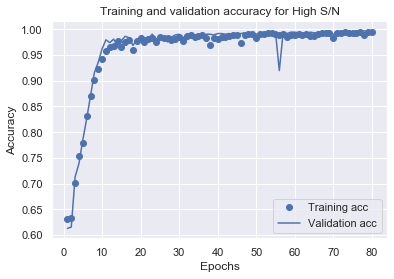

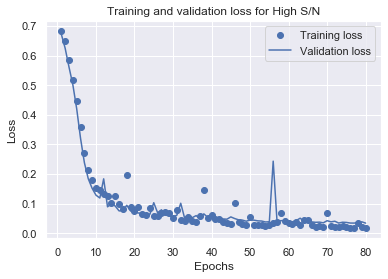

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy for High S/N')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for High S/N')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model.save('high_trained_CNN.h5')
